In [22]:
import pandas as pd
from dateutil import parser

# Create dictionaries with the data
department_df = pd.read_csv("Department_Information.csv")
employee_df = pd.read_csv("Employee_Information.csv")
counseling_df = pd.read_csv("Student_Counceling_Information.csv")
performance_df = pd.read_csv("Student_Performance_Data.csv")

duplicate_ids = department_df['Department_ID'].value_counts()[department_df['Department_ID'].value_counts() > 1].index

if duplicate_ids.empty:
    print("No duplicate Department_IDs found in Department_Information.")
else:
    print("Flag: Duplicate Department_IDs found in Department_Information!")
    print("The duplicate Id's in Department_Information are: \n")

    all_duplicate_ids = pd.DataFrame()

    for Department_ID in duplicate_ids:
        duplicate_row_ids = department_df[department_df['Department_ID'] == Department_ID]
        all_duplicate_ids = pd.concat([all_duplicate_ids, duplicate_row_ids])
    print(all_duplicate_ids[['Department_ID', 'Department_Name', 'DOE']])

# Printing department names that are duplicates
duplicate_name = department_df['Department_Name'].value_counts()[department_df['Department_Name'].value_counts() > 1].index

if duplicate_name.empty:
    print("No duplicate Department_Names found in Department_Information.")
else:
    print("\nFlag: Duplicate Department_Names found in Department_Information!")
    print("The duplicate names in Department_Information are: \n")

    all_duplicate_names = pd.DataFrame()

    for Department_Name in duplicate_name:
        duplicate_row_names = department_df[department_df['Department_Name'] == Department_Name]
        all_duplicate_names = pd.concat([all_duplicate_names, duplicate_row_names])
    print(all_duplicate_names[['Department_ID', 'Department_Name', 'DOE']])

# Printing dates that are over 1900
department_df_copy = department_df.copy()

department_df_copy['DOE'] = department_df_copy['DOE'].astype(str)
department_df_copy['Year_Str'] = department_df_copy['DOE'].str[-4:]
department_df_copy['Year'] = pd.to_numeric(department_df_copy['Year_Str'], errors='coerce')

rows_with_year_below_1900 = department_df_copy[department_df_copy['Year'] < 1900]

if not rows_with_year_below_1900.empty:
    print("\nFlag: Rows with a year lower than 1900 found!")
    print("The years lower than 1900 in Department_Information are: \n")
    print(rows_with_year_below_1900[['Department_ID', 'Department_Name', 'DOE']])
else:
    print("No rows with year lower than 1900 found.")

# Printing any nulls in any attribute
dep_info_with_nulls = department_df[department_df.isnull().any(axis=1)]

if not dep_info_with_nulls.empty:
    print("\nFlag: Nulls found in Department_Information!")
    print("The nulls in Department_Information are: \n")
    print(dep_info_with_nulls)
else:
    print("No rows with null values found.")


print()
print(department_df)

print("----------------------------------")

Flag: Duplicate Department_IDs found in Department_Information!
The duplicate Id's in Department_Information are: 

   Department_ID                                    Department_Name        DOE
11     IDEPT1825                             Mechanical Engineering  9/21/1971
45     IDEPT1825                         Materials Strength Testing  9/21/1971
24     IDEPT7005  Centre of Studies in Resources Engineering (CSRE)  8/22/1966
25     IDEPT7005      Centre of Studies in Craft Engineering (CSCE)  8/22/1966
27     IDEPT9009            Centre for the Study of Ecology in Mars   7/9/2025
39     IDEPT9009                      Laser Technology Enhancements        NaN
15     IDEPT3868          Center for Learning and Teaching (PPCCLT)  3/26/1982
35     IDEPT3868          Center for Learning and Teaching (PPCCLT)  3/26/1982
1      IDEPT5528                     Biosciences and Bioengineering  6/28/1943
21     IDEPT5528                      Sanitation and Digital Gaming        NaN

Flag: Duplicat

In [7]:
#Student Counceling Information

import pandas as pd
from dateutil import parser

# Create dictionaries with the data
counseling_df = pd.read_csv("Student_Counceling_Information.csv")


#Student Councelling Information Data Mining
print("Student Counseling Information Table/Data Frame")
print(counseling_df)

# Check for null values in counseling_df
rows_with_nulls_counseling = counseling_df[counseling_df.isnull().any(axis=1)]

# Adjusting index to correspond to row numbers in Excel sheet
if not rows_with_nulls_counseling.empty:
    rows_with_nulls_counseling.reset_index(drop=True, inplace=True)
    rows_with_nulls_counseling.index += 1  # Adding 1 to each index to match Excel sheet row numbers

    # Print the information
    print("\nFlag: Nulls found in Student Counseling Information!")
    print("The rows with null values in Student Counseling Information are: \n")
    print(rows_with_nulls_counseling)
else:
    print("No rows with null values found in Student Counseling Information.")

mismatched_rows = counseling_df[counseling_df['Department_Admission'] != counseling_df['Department_Choices']]

# Flagging the rows where Department Admission doesn't match Department Choice
if not mismatched_rows.empty:
    print("\nFlag: Mismatch between Department Admission and Department_Choices!")
    print("The rows where Department Admission doesn't match Department_Choices are: \n")
    for idx, row in mismatched_rows.iterrows():
        print("Row number:", idx + 2)  # Adding 1 to match Excel sheet row numbers
else:
    print("All rows have matching Department Admission and Department_Choices.")

print()
print("----------------------------------")

Student Counseling Information Table/Data Frame
       Student_ID       DOA         DOB Department_Choices  \
0     SID20131143  7/1/2013    2/5/1996          IDEPT7783   
1     SID20131151  7/1/2013   7/31/1995          IDEPT6347   
2     SID20131171  7/1/2013    9/5/1995          IDEPT1836   
3     SID20131176  7/1/2013   1/12/1996          IDEPT8473   
4     SID20131177  7/1/2013   7/30/1995          IDEPT5528   
...           ...       ...         ...                ...   
3995  SID20189921  7/1/2018   4/27/2001          IDEPT7005   
3996  SID20189926  7/1/2018  12/10/2000          IDEPT1836   
3997  SID20189949  7/1/2018   4/15/2001          IDEPT4938   
3998  SID20189982  7/1/2018  11/26/2000          IDEPT6347   
3999  SID20189989  7/1/2018    4/5/2001          IDEPT3062   

     Department_Admission  
0               IDEPT7783  
1               IDEPT6347  
2               IDEPT1836  
3               IDEPT8473  
4               IDEPT5528  
...                   ...  
3995       

In [5]:


#Student Performance Data
import pandas as pd
from dateutil import parser

performance_df = pd.read_csv("Student_Performance_Data.csv")

print(performance_df)

#Finding Invalid Marks
rows_with_invalid_marks = performance_df[(performance_df['Marks'] < 0) | (performance_df['Marks'] > 100)]

print("Flag: Rows with invalid marks found in Student_Performance_Data!")
print("The rows where marks are invalid are: \n")
print(rows_with_invalid_marks)

#Displaying Table without the marks that are invalid
valid_performance_df = performance_df[(performance_df['Marks'] >= 0) & (performance_df['Marks'] <= 100)]

print("\nStudent Performance Data after filtering out rows with invalid Marks:")
print(valid_performance_df)

#Finding invalid hours
invalid_hours = performance_df[performance_df['Effort_Hours'] < 0]

if not invalid_hours.empty:
    print("\nFlag: Rows with negative Hours found in Student Performance Data!")
    print("The rows where Hours are negative are: \n")
    for idx, row in invalid_hours.iterrows():
        print(f"Row number: {idx + 2} - {row.to_string(index=False)}")  # Adding 2 to match Excel sheet row numbers
else:
    print("All Hours are non-negative.")

#Displaying table without the hours that are invalid
valid_performance_df = performance_df[performance_df['Effort_Hours'] >= 0]

#Display the DataFrame
print("\nStudent Performance Data after filtering out rows with invalid Hours:")
print(valid_performance_df)

#Printing rows that find a student id that has a more than 1 mark per paper




#printing any missing values in student_performance_data and discard them
performance_info_with_nulls = performance_df[performance_df.isnull().any(axis=1)]

if not performance_info_with_nulls.empty:
    print("\nFlag: Nulls found in Student_Performance_Data!")
    print("The nulls in Student_Performance_Data are: \n")
    print(performance_info_with_nulls)
else:
    print("No rows with null values found.")

print()
print("Student_Performance_Data after filtering out rows with invalid hours: \n")
dropped_performance_nulls_df = performance_df.dropna()
print(dropped_performance_nulls_df)


         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
0       SID20131143        Sem_1  SEMI0012995    Paper 1   44.0           5.0
1       SID20131143        Sem_1  SEMI0015183    Paper 2   74.0           8.0
2       SID20131143        Sem_1  SEMI0018371    Paper 3   80.0           8.0
3       SID20131143        Sem_1  SEMI0015910    Paper 4   44.0           5.0
4       SID20131143        Sem_1  SEMI0016208    Paper 5   95.0          12.0
...             ...          ...          ...        ...    ...           ...
209605  SID20189989        Sem_8  SEMI0082598    Paper 3   94.0          12.0
209606  SID20189989        Sem_8  SEMI0088030    Paper 4   49.0           5.0
209607  SID20189989        Sem_8  SEMI0081794    Paper 5   47.0         257.0
209608  SID20189989        Sem_8  SEMI0086600    Paper 6   87.0          11.0
209609  SID20189989        Sem_8  SEMI0083259    Paper 6   73.0           8.0

[209610 rows x 6 columns]
Flag: Rows with invalid marks found i

Predicted mark for 10 effort hours: 10.0


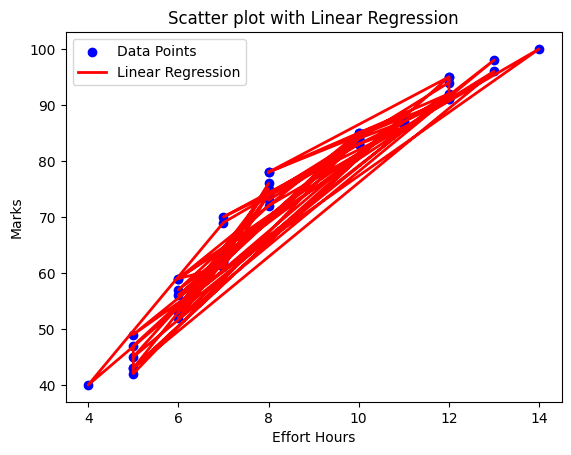

In [11]:
#Neccesary Calculations
#SID20131151
#SID20149500
#SID20182516

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
sp = pd.read_csv('Student_Performance_Data.csv')

sp_sid_20131151 = sp[sp['Student_ID'] == 'SID20131151']
sp_sid_20149500 = sp[sp['Student_ID'] == 'SID20149500']
sp_sid_20182516 = sp[sp['Student_ID'] == 'SID20149500']


# Extract columns
X = sp_sid_20131151['Effort_Hours'].values.reshape(-1, 1)  # Independent variable (Effort_Hours)
y = sp_sid_20131151['Marks'].values.reshape(-1, 1)         # Dependent variable (Marks)

# # Fit linear regression model
model = LinearRegression()
model.fit(X, y)

hours = [[10]]  # We need to provide input as a 2D array
predicted_mark = model.predict(hours)

print("Predicted mark for 10 effort hours:", predicted_mark[0][0])

# Make predictions
y_pred = model.predict(X)

# Plot scatter plot
plt.scatter(X, y, color='blue', label='Data Points')

# Plot regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
# Add labels and legend
plt.xlabel('Effort Hours')
plt.ylabel('Marks')
plt.title('Scatter plot with Linear Regression')
plt.legend()
# Show plot
plt.show()